넷플릭스 데이터 분석하기 <br>
**출처**: https://www.kaggle.com/shivamb/netflix-shows

https://www.kaggle.com/amalseb4stian/netflix-final <br> https://www.kaggle.com/neithskk/eda-netflix-beginner

---

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 필요한 모듈 삽입 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 넷플릭스 데이터 로드 => netflix 변수에 저장 
netflix = pd.read_csv("/content/drive/MyDrive/Netflix/netflix_titles.csv") 
display(netflix.head(3), netflix.tail(3))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# netflix 데이터셋이 몇개의 행과 열로 구성된 데이터프레임인지 확인 => shape
netflix.shape

(7787, 12)

In [ ]:
# netflix의 컬럼명 확인 => columns
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# 결측값 확인하기(1)
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# 결측값 확인하기(2)
# 결측값이 있는 column만 dataset_with_na변수에 저장.
dataset_with_na = [features for features in netflix.columns if netflix[features].isnull().sum()>1]  # => ['director', 'cast', 'country', 'date_added', 'rating']
for feature in dataset_with_na:
    print(feature, np.round(netflix[feature].isnull().mean(), 4),  ' % missing values')

director 0.3068  % missing values
cast 0.0922  % missing values
country 0.0651  % missing values
date_added 0.0013  % missing values
rating 0.0009  % missing values


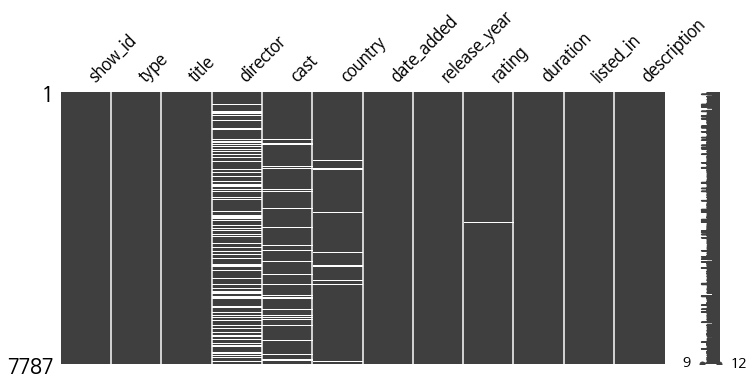

In [ ]:
# 결측값 시각화하기 => missingno 사용
msno.matrix(netflix, figsize=(12,5))

---

In [ ]:
# netflix 프로그램 Type 분석 => 'TV Show', 'Movie' 값만 존재
netflix['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

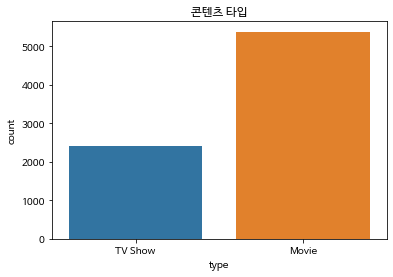

In [ ]:
# netflix 데이터의 type을 그래프로 출력하기 => seaborn을 이용
sns.countplot(x='type', data=netflix)
plt.title('콘텐츠 타입')
plt.show()

In [ ]:
# netflix 프로그램 rating 분석 => 'TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan, 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR' 존재
netflix['rating'].unique() 

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

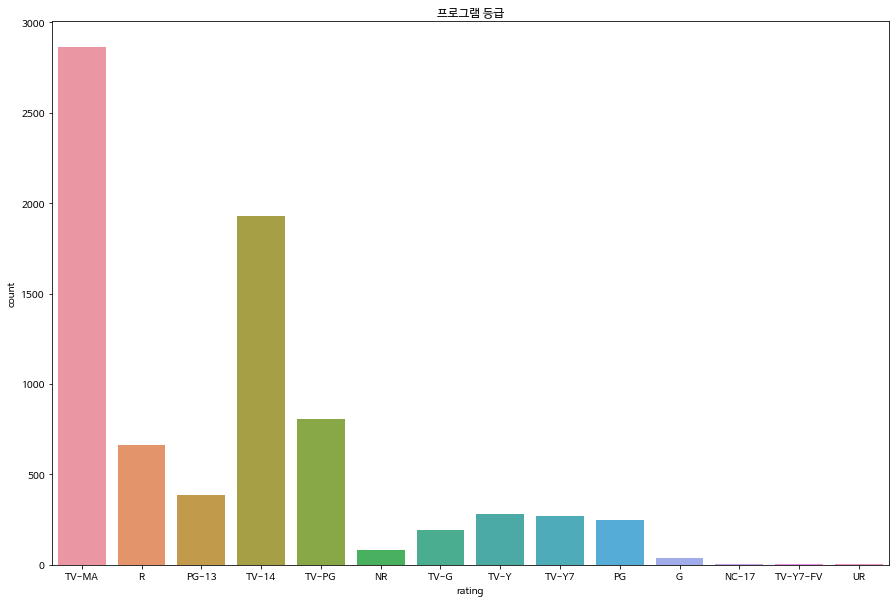

In [ ]:
# netflix 데이터의 rating을 그래프로 출력하기 => seaborn을 이용
plt.figure(figsize=(15,10))
sns.countplot(x='rating', data=netflix)
plt.title('프로그램 등급')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


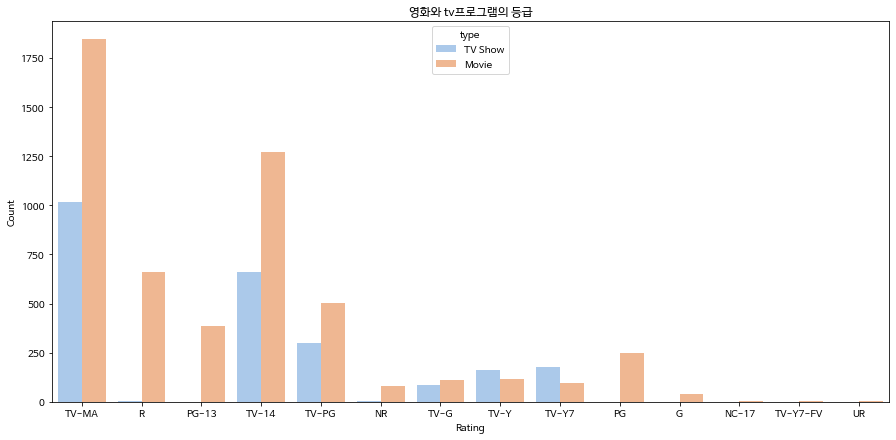

In [ ]:
order = ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix.rating, hue=netflix.type, order=order, palette="pastel");
plt.title("영화와 tv프로그램의 등급")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

---

In [ ]:
# 콘텐츠의 개봉년도 분석
netflix['release_year'].unique() 

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
# 1980년 이후의 개봉작만 추출하여 그래프로 그리기 
year_netflix = netflix.groupby('release_year').count()['title']
year_netflix

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: title, Length: 73, dtype: int64

In [ ]:
year_netflix.columns=['release_year']
year_netflix.sort_index
year_netflix = pd.DataFrame(year_netflix[year_netflix.index>=1980])
display(year_netflix.head(5), year_netflix.tail(5))

,title
release_year,
1980,9
1981,9
1982,15
1983,9
1984,9


,title
release_year,
2017,1012
2018,1121
2019,996
2020,868
2021,31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


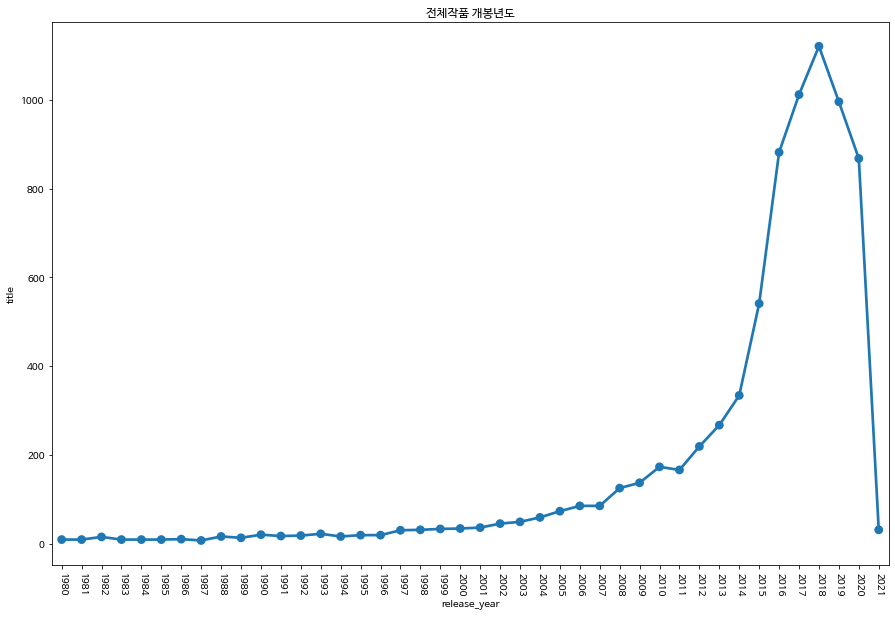

In [ ]:
plt.figure(figsize=(15,10))
plt.rc('font', family='NanumBarunGothic') 
x = year_netflix.index
ax = sns.pointplot(x, y='title',data=year_netflix)
plt.title('전체작품 개봉년도')
plt.xticks(rotation=270)
plt.show()

In [ ]:
# 영화 개봉년도만 추출하여 그래프로 출력하기 => 2001년도 부터 체크
year_movie = netflix[netflix["type"]=="Movie"]["release_year"].value_counts().head(20)
year_movie.columns=['release_year']
year_movie.sort_index
year_movie =pd.DataFrame(year_movie)
year_movie

,release_year
2017,744
2018,734
2016,642
2019,582
2020,411
2015,382
2014,244
2013,202
2012,158
2010,136


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


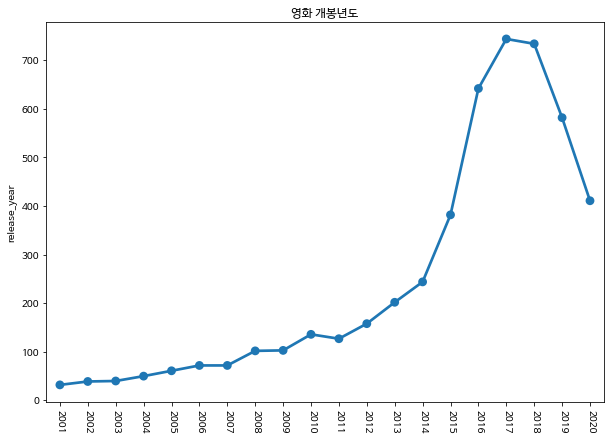

In [ ]:
# 그래프 작성 
plt.figure(figsize = [10,7])
plt.rc('font', family='NanumBarunGothic') 
x = year_movie.index
ax = sns.pointplot(x,y = year_movie['release_year'], data=year_movie)
plt.title('영화 개봉년도')
plt.xticks(rotation=270)
plt.show()

In [ ]:
# tv프로그램 개봉년도만 추출하여 그래프로 출력하기 => 2001년도 부터 체크
year_TVShow = netflix[netflix["type"]=="TV Show"]["release_year"].value_counts().head(20)
year_TVShow.columns=['release_year']
year_TVShow.sort_index
year_TVShow =pd.DataFrame(year_TVShow)
year_TVShow

,release_year
2020,457
2019,414
2018,387
2017,268
2016,240
2015,159
2014,90
2013,65
2012,61
2011,39


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


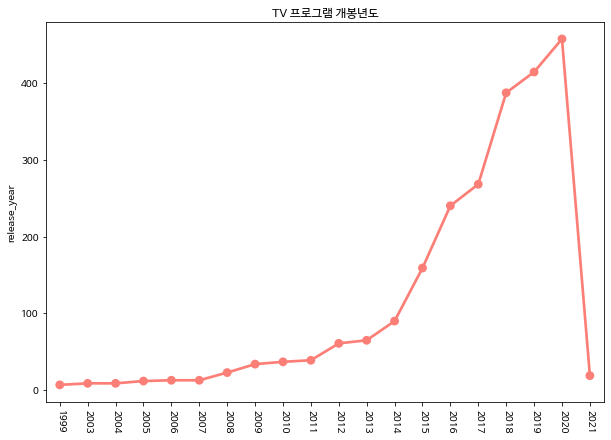

In [ ]:
# 그래프 작성 
plt.figure(figsize = [10,7])
plt.rc('font', family='NanumBarunGothic') 
x = year_TVShow.index
ax = sns.pointplot(x,y = year_TVShow['release_year'], data=year_TVShow, color='#FC7F77')
plt.title('TV 프로그램 개봉년도')
plt.xticks(rotation=270)
plt.show()

---

In [ ]:
# Netflix 작품 국가 상위 10개국 분석 => 공동제작인 경우가 多 => 정리할 필요가 있다, 
netflix['country'].unique() 

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [ ]:
# 공동제작 나라 분류하기
netflix_countries = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
netflix_countries

title
3%                                                 Brazil
7:19                                               Mexico
23:59                                           Singapore
9                                           United States
21                                          United States
                                                ...      
Zubaan                                              India
Zumbo's Just Desserts                           Australia
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    United Kingdom
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Canada
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     United States
Length: 9063, dtype: object

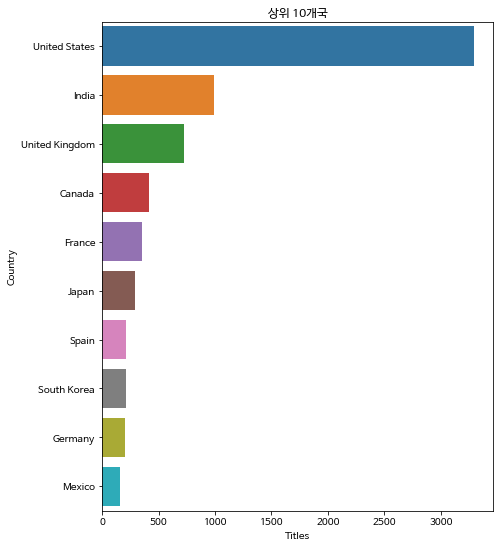

In [ ]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = netflix_countries, order=netflix_countries.value_counts().index[:10])
plt.title('상위 10개국')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

---

In [ ]:
# 'listed_in' 칼럼을 분석하여 장르 분석 => 장르가 여러가지인 작품이 多  
netflix['listed_in'].unique() 

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [ ]:
# 장르 분류하기
netflix_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
netflix_genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17071, dtype: object

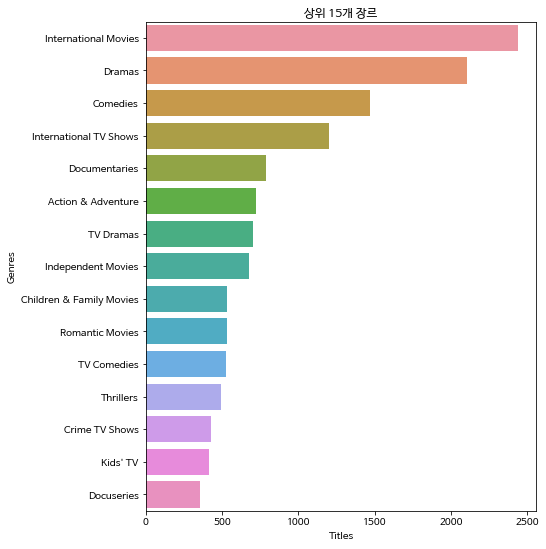

In [ ]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = netflix_genres, order=netflix_genres.value_counts().index[:15])
plt.title('상위 15개 장르')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

---

In [ ]:
# 영화 러닝타임 분석 
netflix_Movie = netflix[netflix["type"]=="Movie"]["duration"].value_counts().head(20)
netflix_Movie.sort_index
netflix_Movie = pd.DataFrame(netflix_Movie)
netflix_Movie

,duration
90 min,136
93 min,131
94 min,125
91 min,125
95 min,119
92 min,118
97 min,117
96 min,115
98 min,106
99 min,101


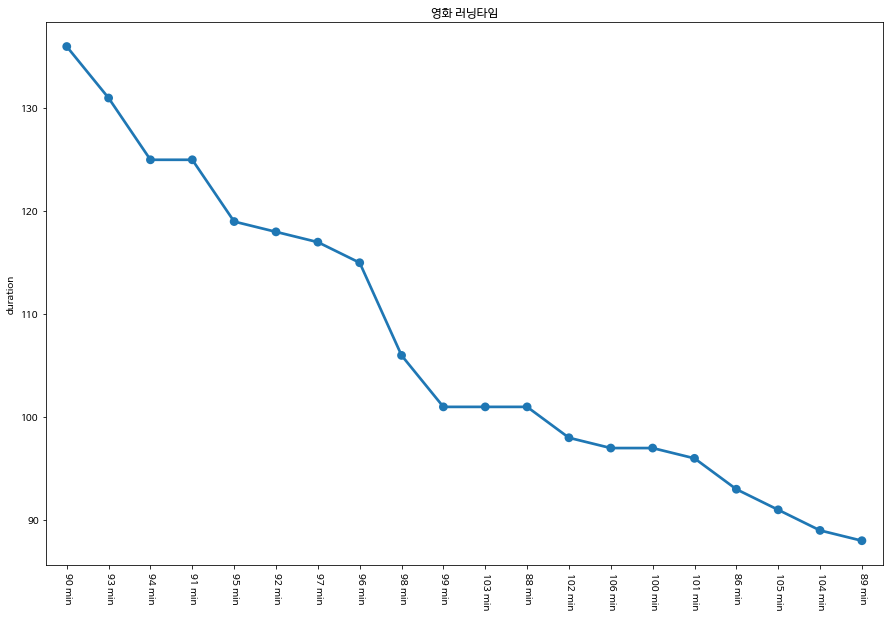

In [ ]:
# netflix 영화 데이터의 duration을 그래프로 출력하기 => seaborn을 이용
plt.figure(figsize=(15,10))
ax = sns.pointplot(x = netflix_Movie.index, y=netflix_Movie['duration'], data=netflix_Movie)
plt.title('영화 러닝타임')
plt.xticks(rotation=270)
plt.show()

In [ ]:
# TV Show 시즌 분석 
netflix_TVShow = netflix[netflix["type"]=="TV Show"]["duration"].value_counts().head(20)
netflix_TVShow.sort_index
netflix_TVShow = pd.DataFrame(netflix_TVShow)
netflix_TVShow

,duration
1 Season,1608
2 Seasons,382
3 Seasons,184
4 Seasons,87
5 Seasons,58
6 Seasons,30
7 Seasons,19
8 Seasons,18
9 Seasons,8
10 Seasons,6


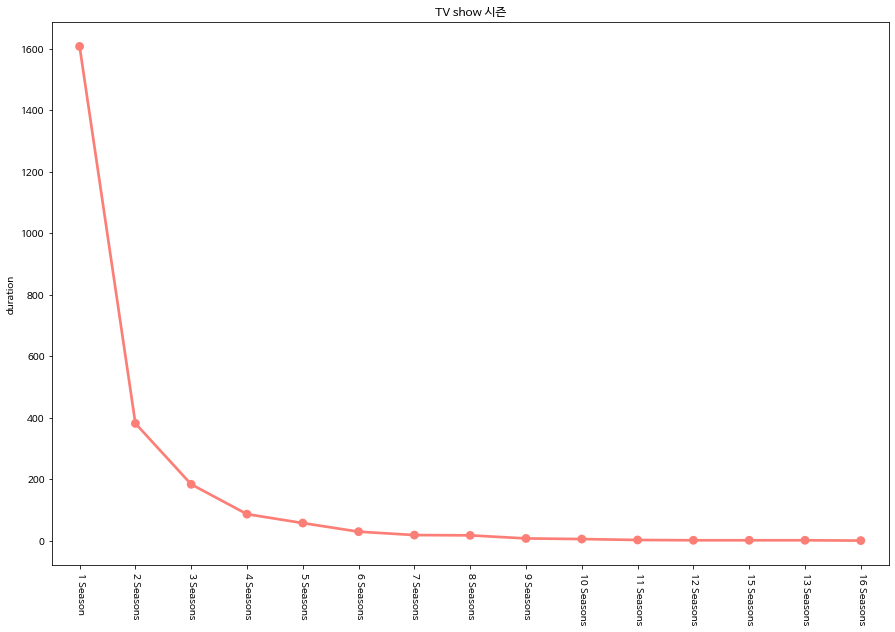

In [ ]:
# netflix 데이터의 duration을 그래프로 출력하기 => seaborn을 이용
plt.figure(figsize=(15,10))
ax = sns.pointplot(x = netflix_TVShow.index, y=netflix_TVShow['duration'], data=netflix_TVShow, color='#FC7F77')
plt.title('TV show 시즌')
plt.xticks(rotation=270)
plt.show()